In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams["figure.figsize"] = (35, 17)

In [9]:
df = pd.DataFrame()
projects = ["JPetStore", "DayTrader", "AcmeAir", "Plants"]
methods = ["Mo2oM", "Mono2Multi", "HDBSCAN", "CoGCN", "Mono2Micro", "FoSCI", "MEM", "Bunch"]
metrics = ["SM", "ICP", "IFN", "NED"]
explanation = {
	"SM": " (higher is better)",
	"ICP": " (lower is better)",
	"IFN": " (lower is better)",
	"NED": " (lower is better)"
}
for project in projects:
	for method in methods:
		with open(f"../results/{method}/{method}_{project}_output.json", "r") as f:
			data = json.load(f)
			new_df = pd.DataFrame(data)[metrics]
			new_df["Project"] = project
			new_df["Method"] = method
			df = pd.concat([df, new_df])

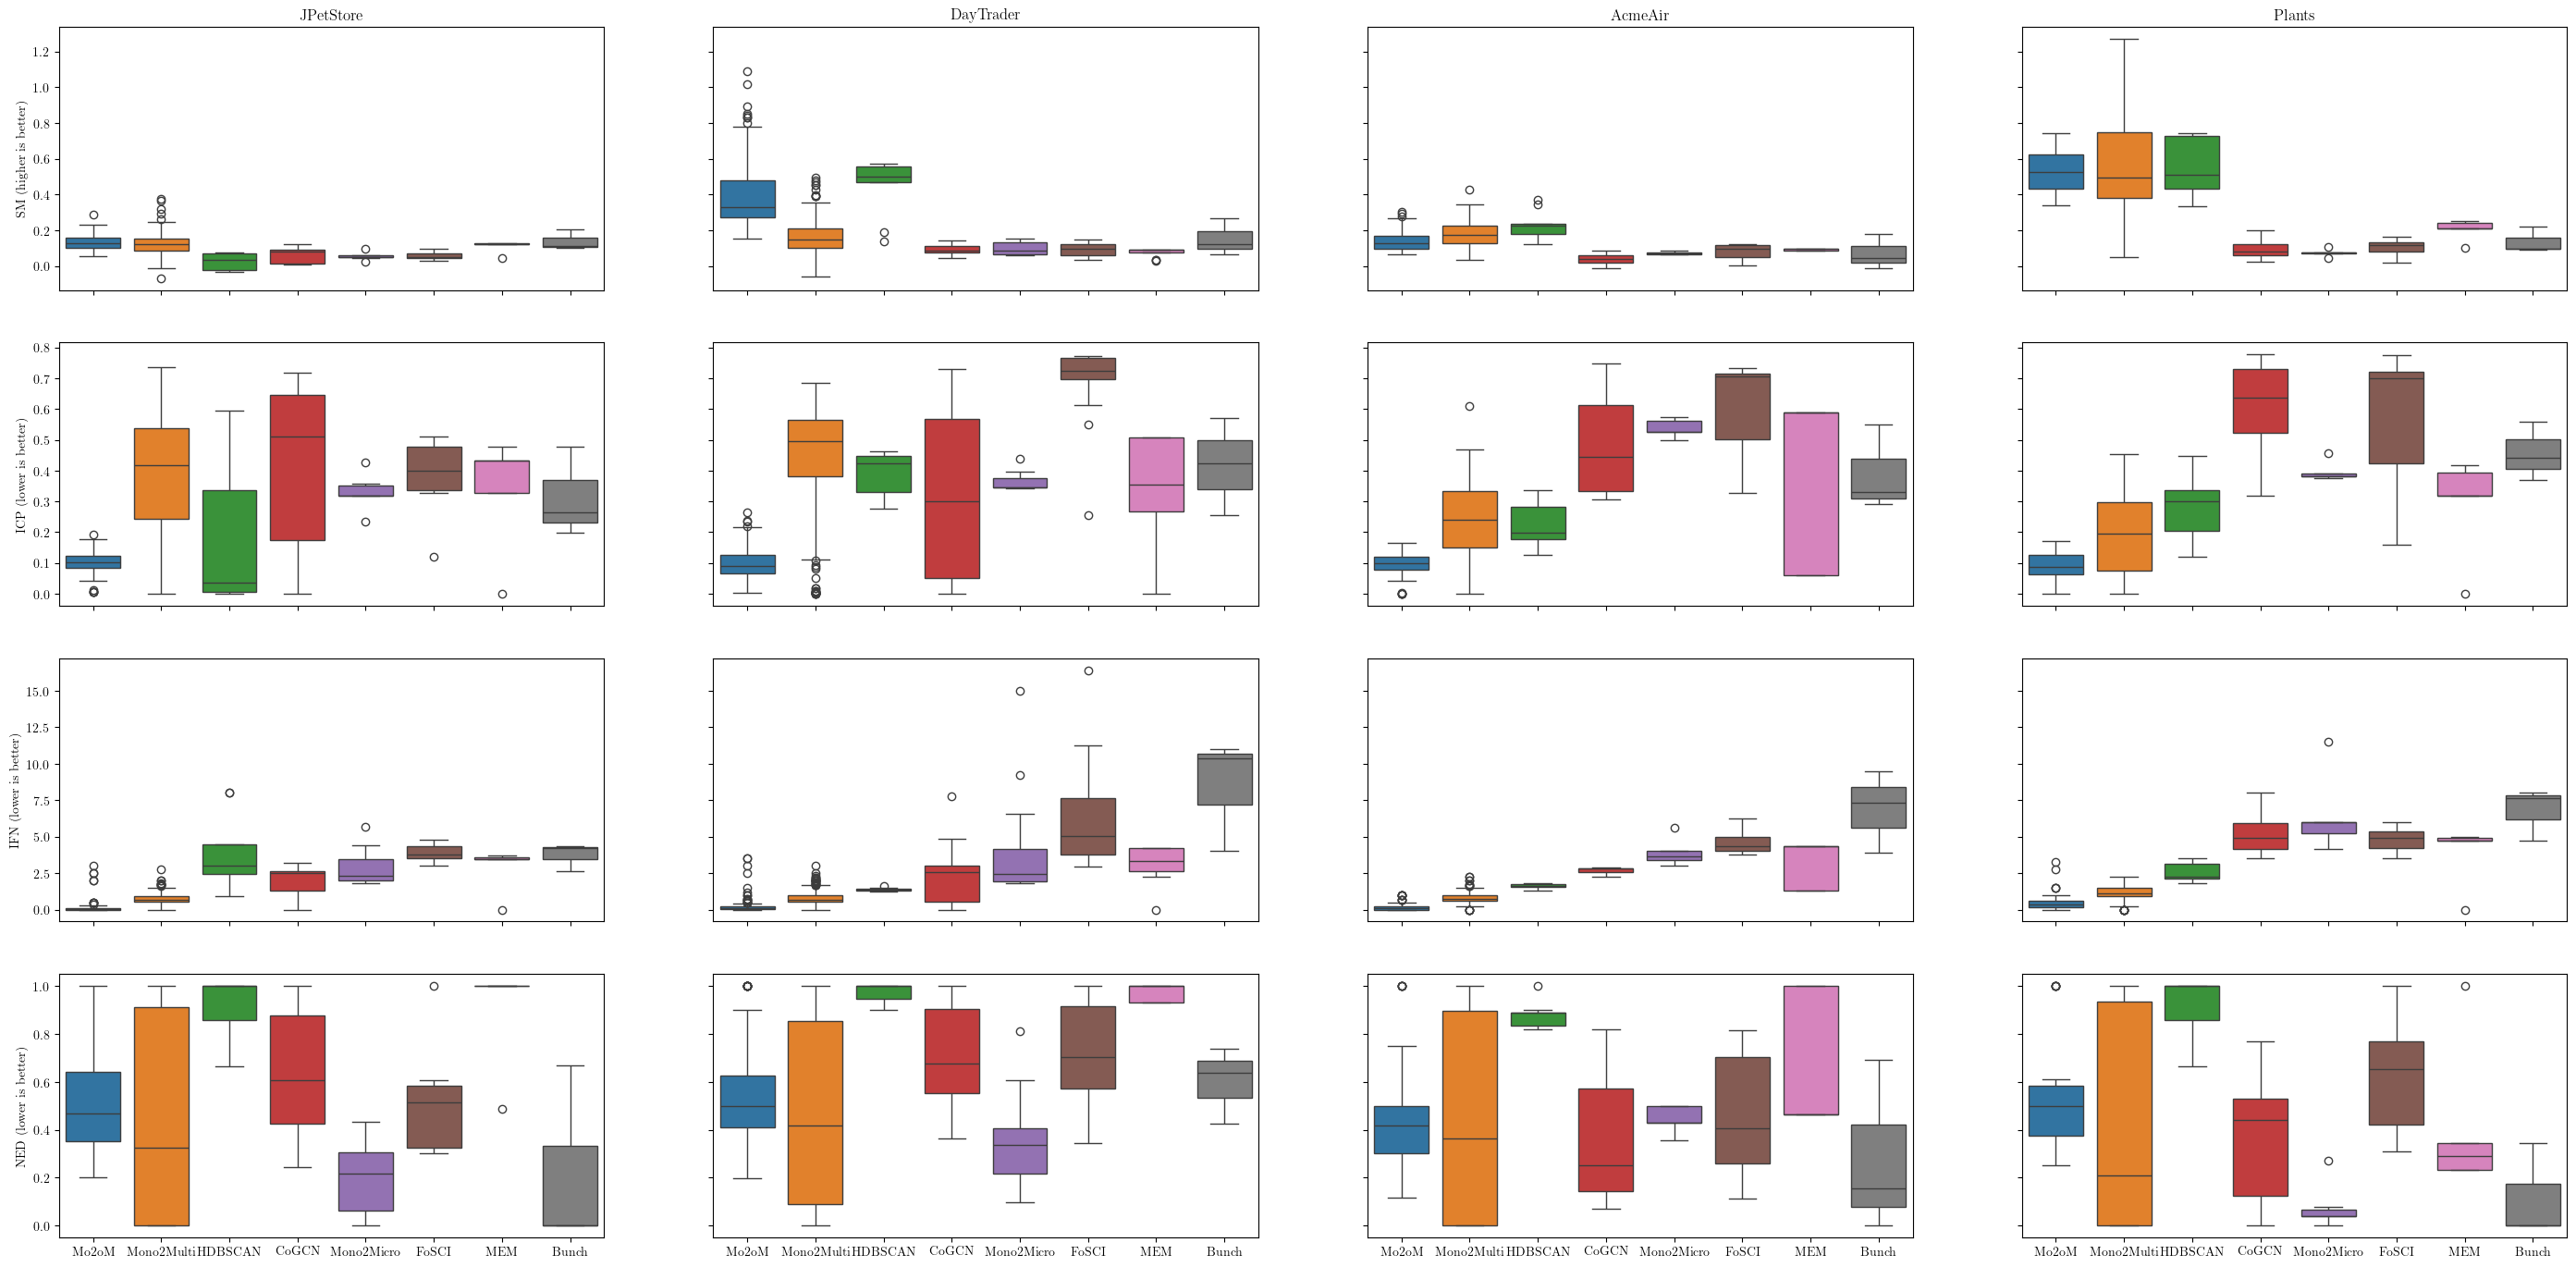

In [10]:
fig, axes = plt.subplots(4, 4, sharex='col', sharey='row')

for i, metric in enumerate(metrics):
	for j, project in enumerate(projects):
		axes[0,j].set_title(project)
		sns.boxplot(data=df[df["Project"]==project], x="Method", y=metric, hue="Method", ax=axes[i, j])
		axes[i,j].set_xlabel(None)
		axes[i,j].set_ylabel(metric+explanation[metric])
fig.savefig("BoxPlots.pdf", bbox_inches="tight")